# 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import os
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

C:\Users\82109\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
os.chdir('C:/Users/82109/Desktop')

In [3]:
# 기본 설정 읽기
import matplotlib.pyplot as plt

# size, family
print('# 설정되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정되어있는 폰트 사이즈
10.0
# 설정되어있는 폰트 글꼴
['sans-serif']


In [4]:
import platform
platform.system()

'Windows'

In [5]:
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

In [241]:
df = pd.read_excel('df.xlsx')
df.head()
# date : 방송일시
# exposer : 노출분
# mot_code : 마더코드
# product_code : 상품코드
# product_name : 상품명
# group : 상품군
# product_detail : 상품소분류
# brand : 브랜드
# price : 판매단가
# tot_price : 취급액
# sales : 판매수량
# hour : 방송시간대
# dow : 요일(day of week)
# group_dow : 요일그룹
# ratings : 최대 시청률
# early : 조기마감여부
# month : 방송월
# season : 방송계절
# day_night : 시간대그룹
# group_time1 : 시간대등급1
# group_time2 : 시간대등급2
# group_exposure : 노출빈도그룹
# detail : 디테일
# temperature : 평균기온
# test : 테스트셋과 비슷한 상품

,date,exposure,mot_code,product_code,product_name,group,product_detail,brand,price,tot_price,...,month,season,day_night,group_time1,group_time2,group_exposure,detail,temperature,test,rating_mean
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,상의,테이트,39900,2099000,...,1,겨울,오전,B,B,0,0,-3.70,0,0.0
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,상의,테이트,39900,4371000,...,1,겨울,오전,B,B,0,0,-3.70,0,0.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,상의,테이트,39900,3262000,...,1,겨울,오전,B,B,0,0,-3.71,0,0.0
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,상의,테이트,39900,6955000,...,1,겨울,오전,B,B,0,0,-3.71,0,0.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,상의,테이트,39900,6672000,...,1,겨울,오전,B,B,0,1,-3.71,0,0.0


# 데이터 전처리(간단하게)

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35378 entries, 0 to 35377
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            35378 non-null  datetime64[ns]
 1   exposure        35378 non-null  float64       
 2   mot_code        35378 non-null  int64         
 3   product_code    35378 non-null  int64         
 4   product_name    35378 non-null  object        
 5   group           35378 non-null  object        
 6   product_detail  35378 non-null  object        
 7   brand           35378 non-null  object        
 8   price           35378 non-null  int64         
 9   tot_price       35378 non-null  int64         
 10  sales           35378 non-null  float64       
 11  hour            35378 non-null  int64         
 12  dow             35378 non-null  object        
 13  group_dow       35378 non-null  int64         
 14  ratings         35378 non-null  float64       
 15  ea

In [243]:
df = df.astype({'date':'datetime64[ns]'})

In [244]:
df['price'].describe()

count    3.537800e+04
mean     3.878541e+05
std      6.264218e+05
min      1.280000e+04
25%      5.900000e+04
50%      9.900000e+04
75%      3.990000e+05
max      7.930000e+06
Name: price, dtype: float64

In [245]:
conditionlist = [
    (df['price'] <= 59000) ,
    (df['price'] > 59000) & (df['price'] <=99000),
    (df['price'] > 99000) & (df['price'] <=399000),
    (df['price'] > 399000)]
choicelist = ['1','2','3','4']
df['price_range'] = np.select(conditionlist, choicelist, default='Not Specified')

In [246]:
cl = df[['price','sales']]
cl.shape

(35378, 2)

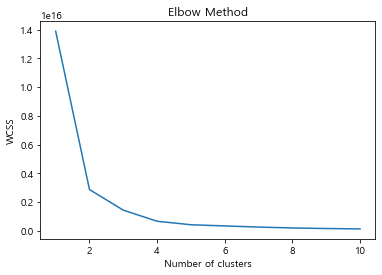

In [247]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(cl)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [248]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['price_cluster'] = kmeans.fit_predict(cl)

# 시각화

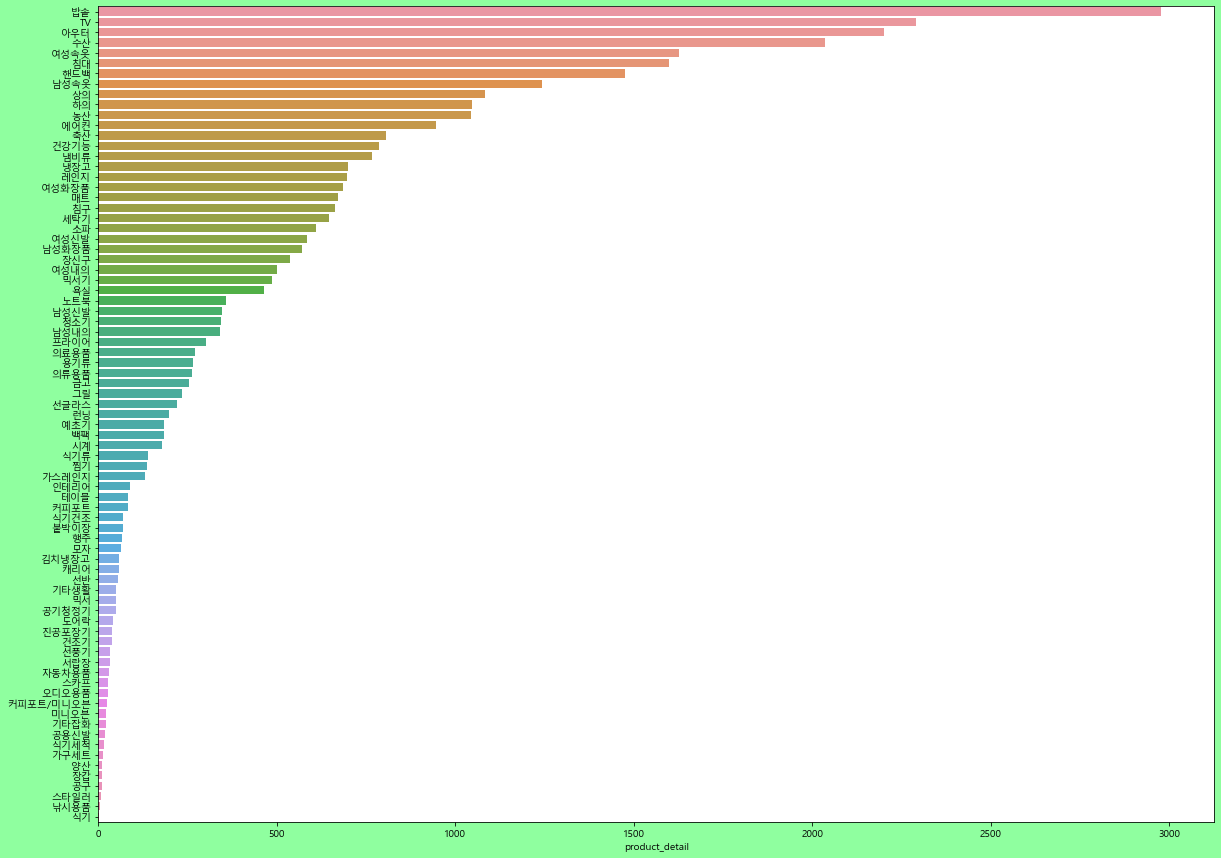

In [198]:
# 상품 소분류별 등장 빈도수
fig = plt.figure(figsize=(20, 15))
fig.patch.set_facecolor('xkcd:mint green')
sns.barplot(y=df['product_detail'].value_counts().index,x=df['product_detail'].value_counts())

In [199]:
col_list = ['group','hour', 'dow',
       'group_dow', 'early', 'month', 'season', 'day_night',
       'group_time1', 'group_time2', 'group_exposure', 'detail', 
       'test','price_range','price_cluster']

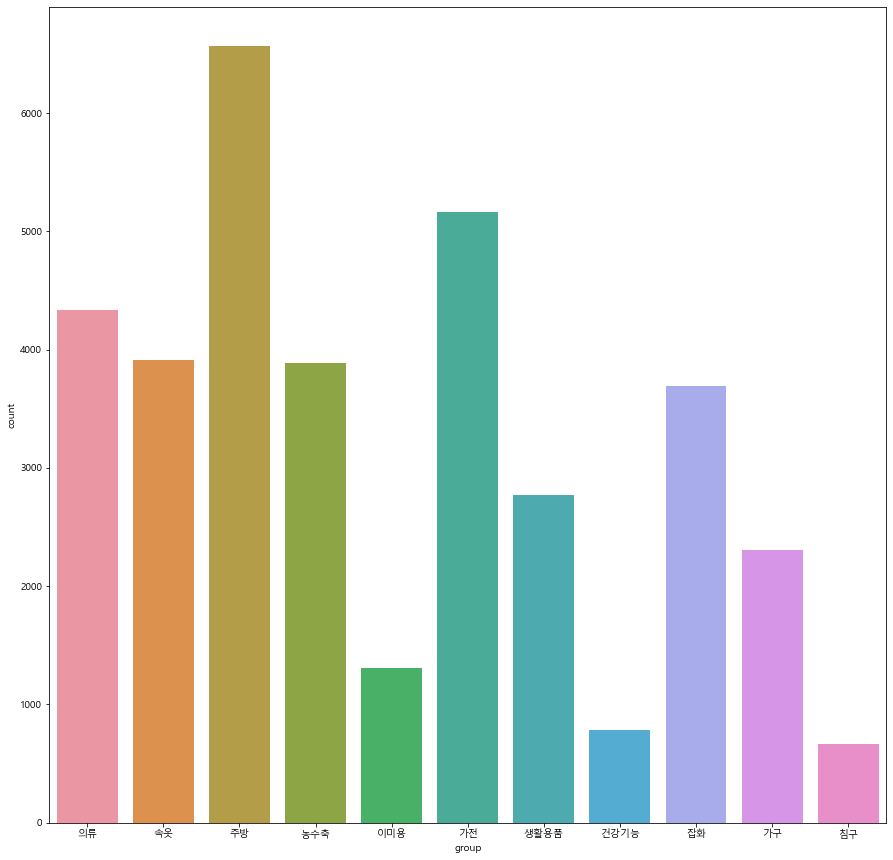

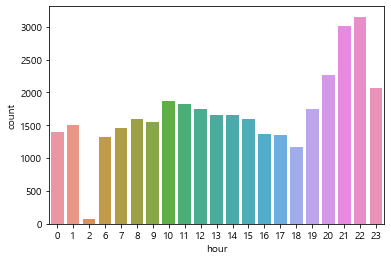

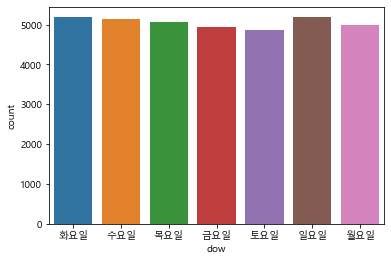

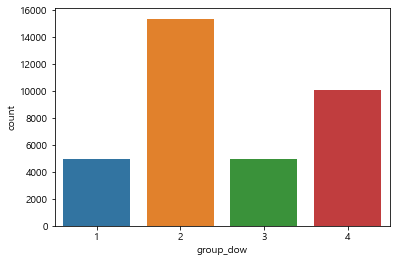

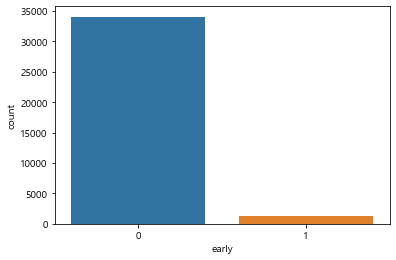

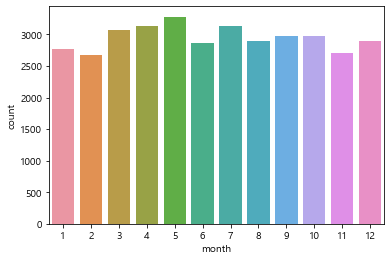

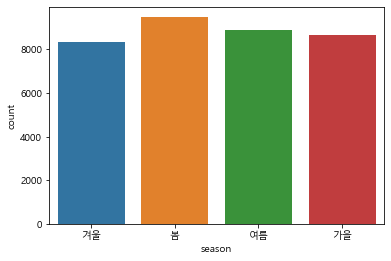

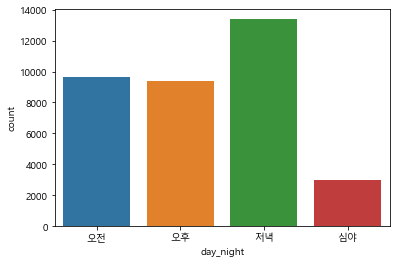

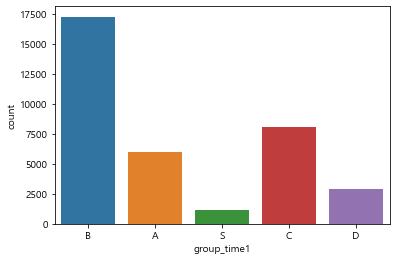

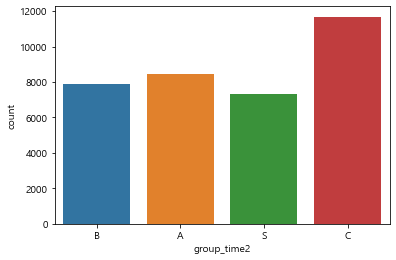

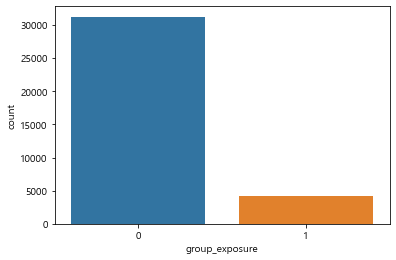

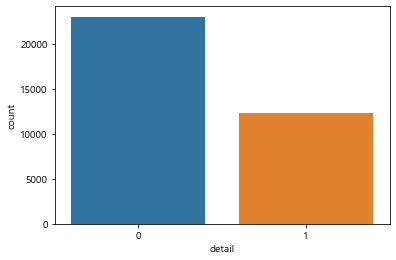

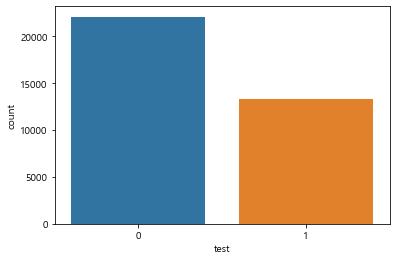

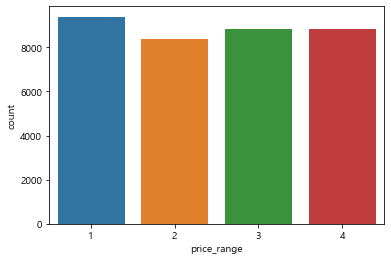

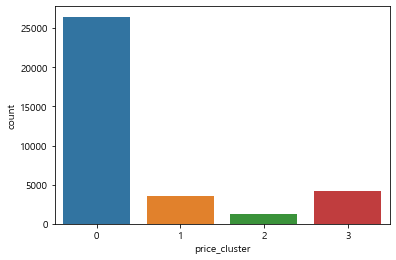

In [200]:
plt.figure(figsize = (15,15))
for col in col_list:
    sns.countplot(x=df[col],data=df)
    plt.show()

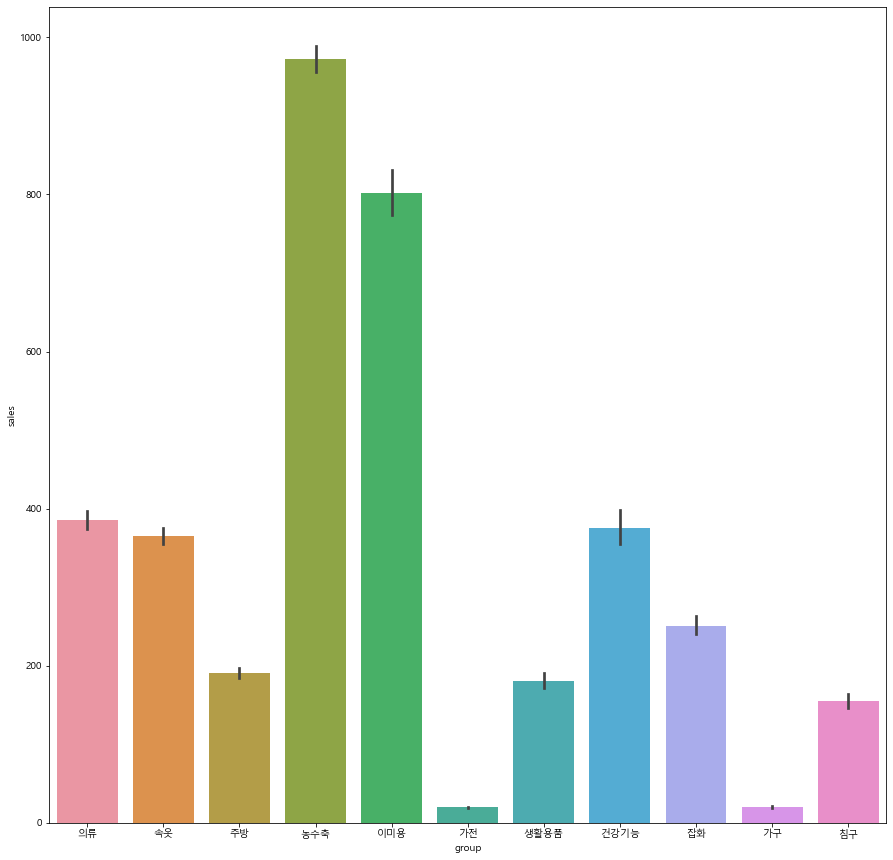

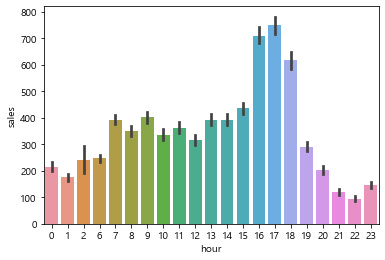

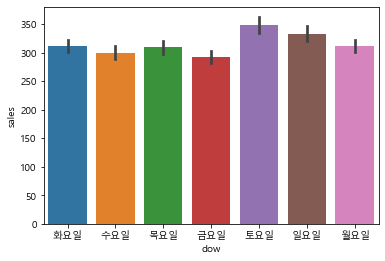

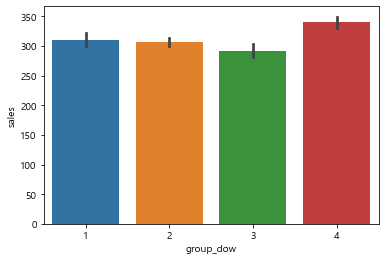

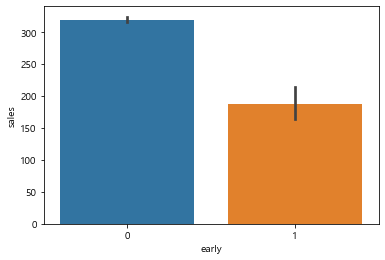

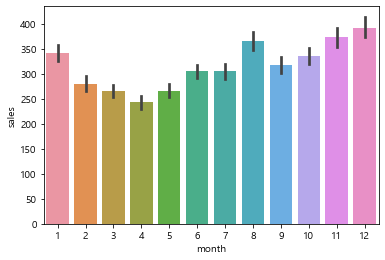

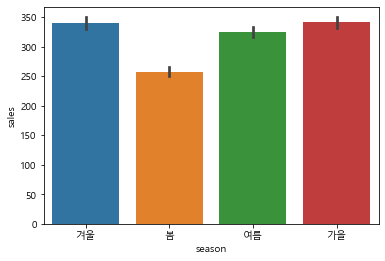

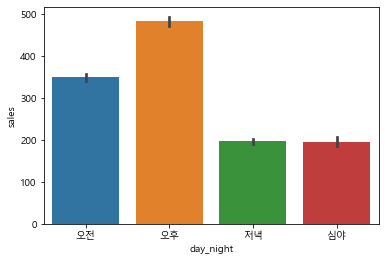

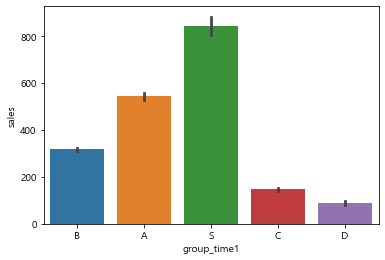

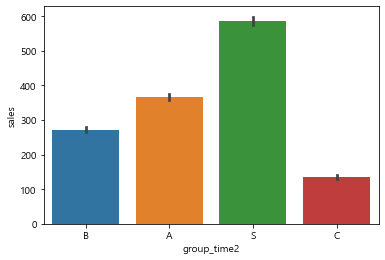

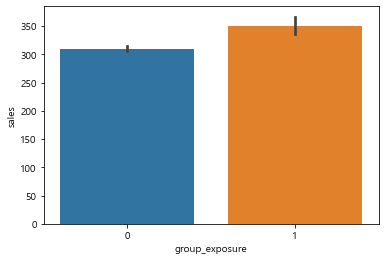

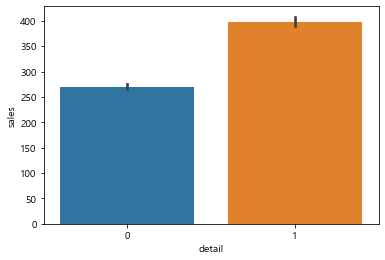

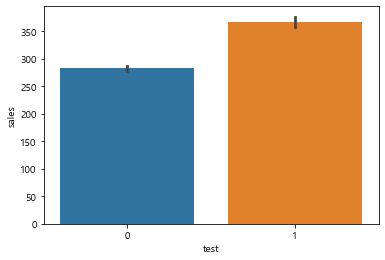

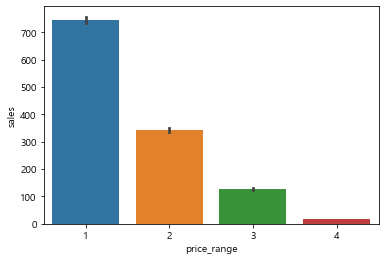

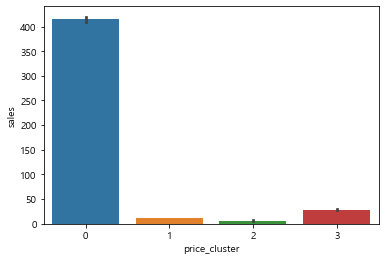

In [201]:
plt.figure(figsize = (15,15))
for col in col_list:
    sns.barplot(y = 'sales', x = df[col], data = df)
    plt.show()

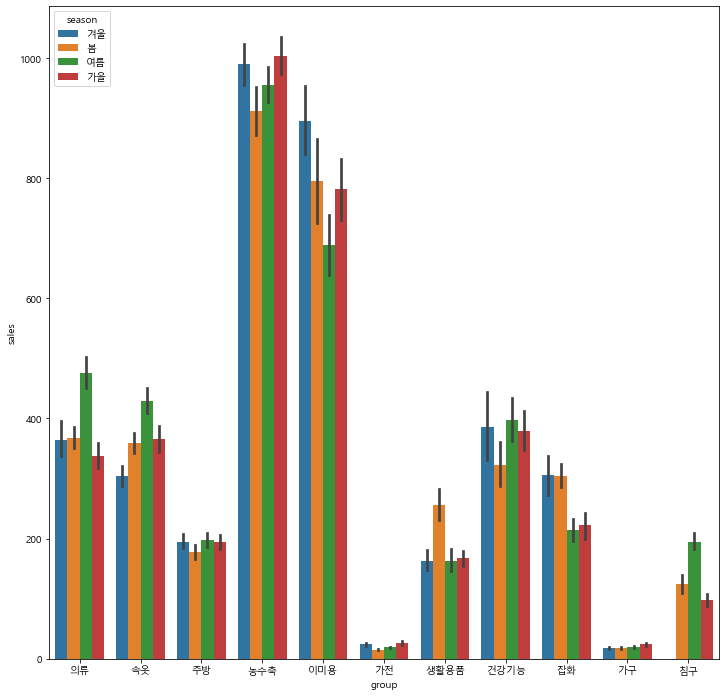

In [202]:
plt.figure(figsize = (12,12))
sns.barplot(y = 'sales', x = 'group', hue = 'season', data = df)

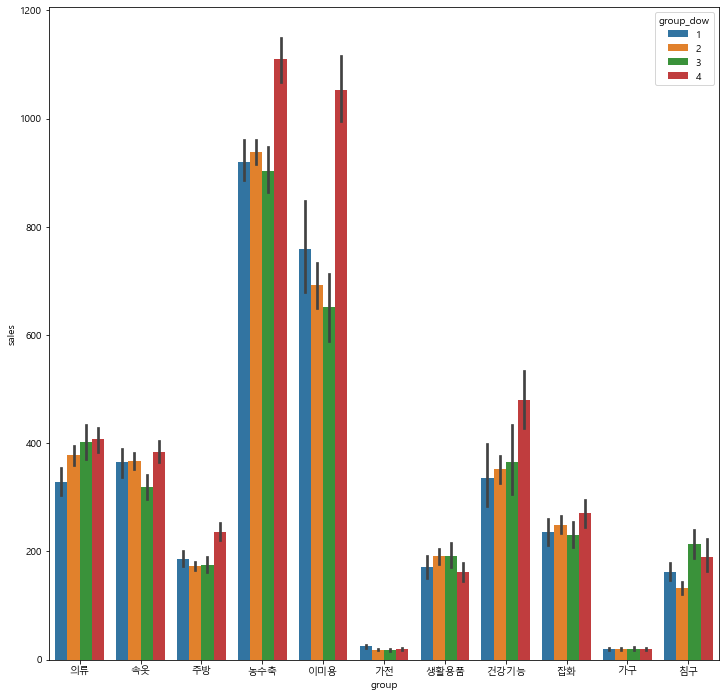

In [203]:
plt.figure(figsize = (12,12))
sns.barplot(y = 'sales', x = 'group', hue = 'group_dow', data = df)

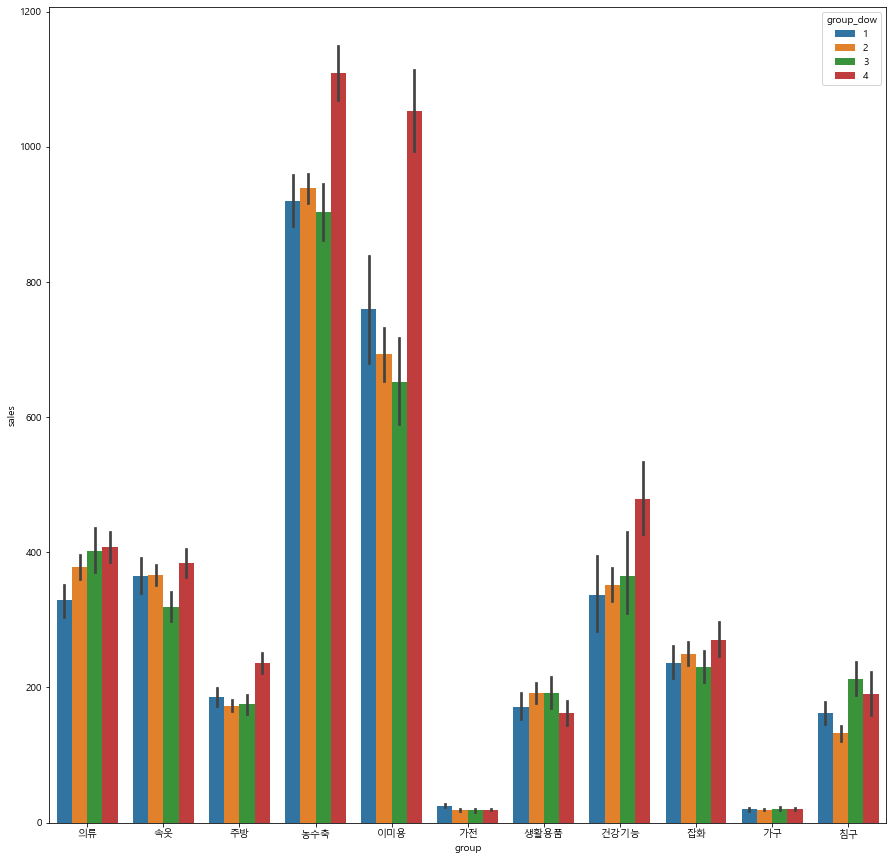

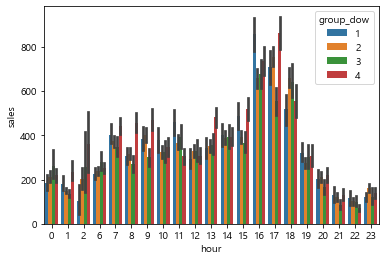

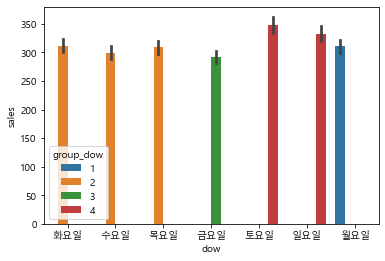

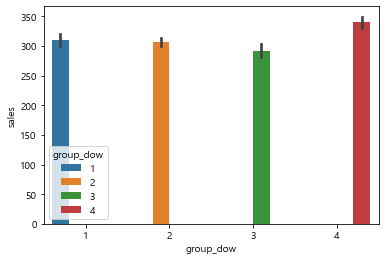

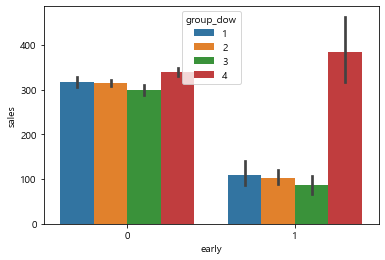

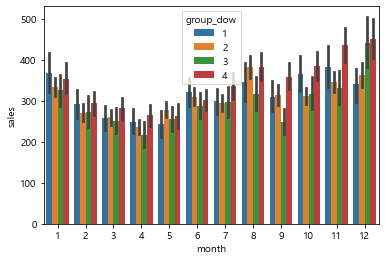

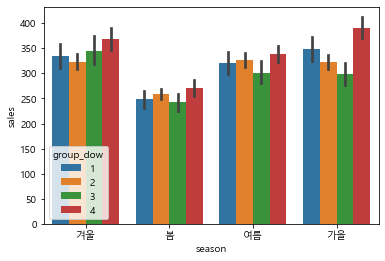

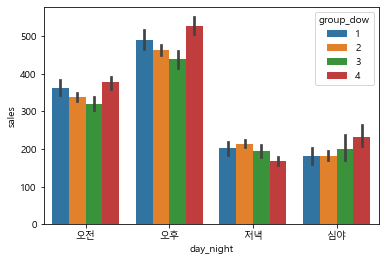

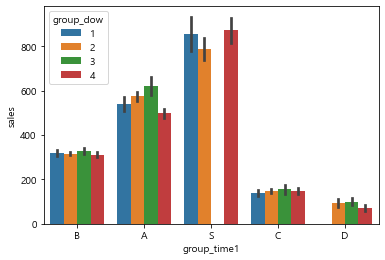

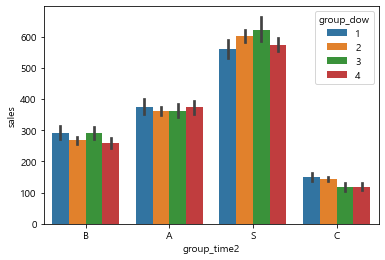

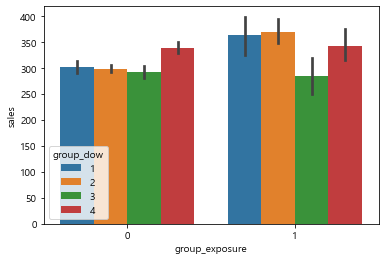

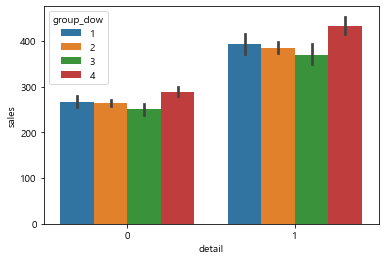

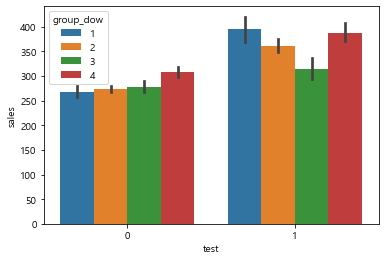

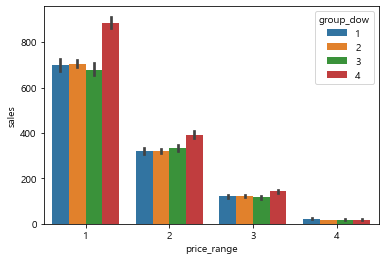

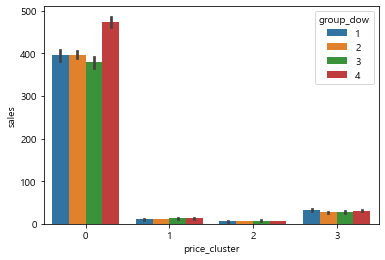

In [204]:
plt.figure(figsize = (15,15))
for col in col_list:
    sns.barplot(y = 'sales', x = df[col],hue ='group_dow' , data = df)
    plt.show()

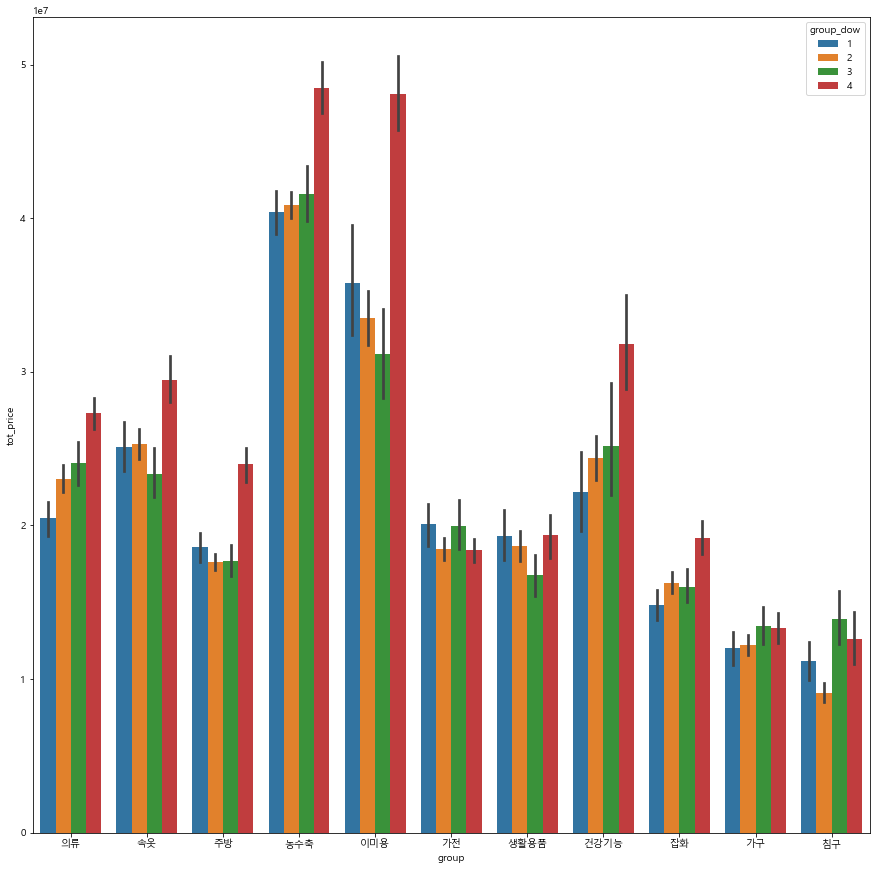

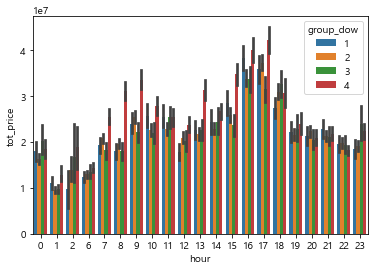

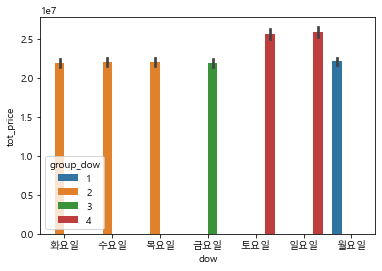

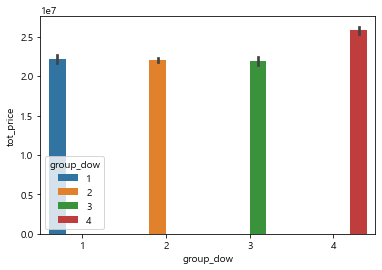

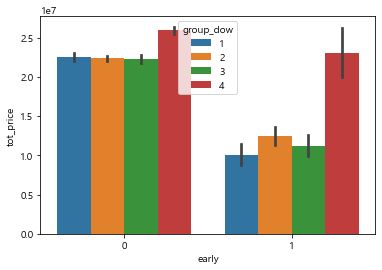

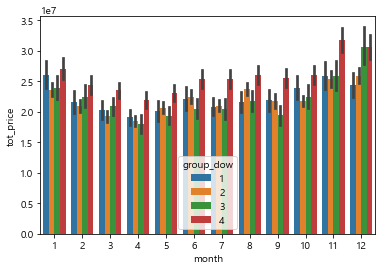

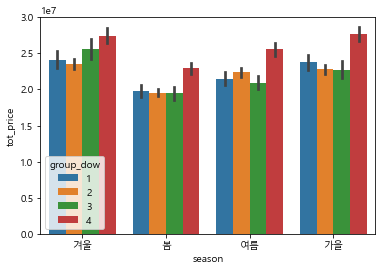

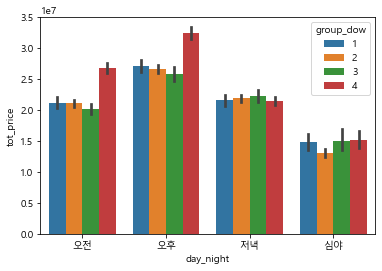

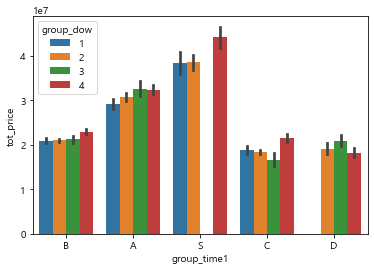

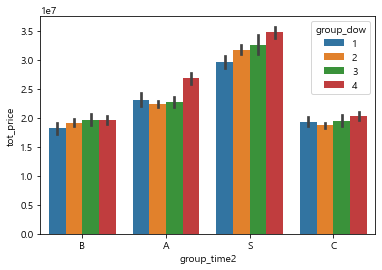

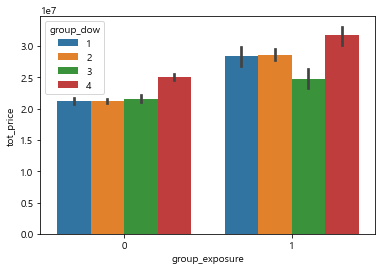

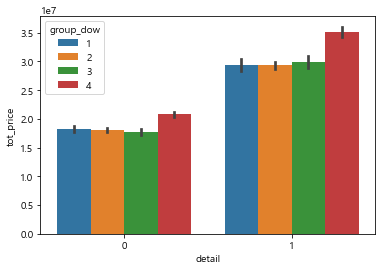

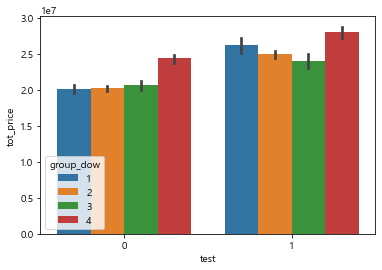

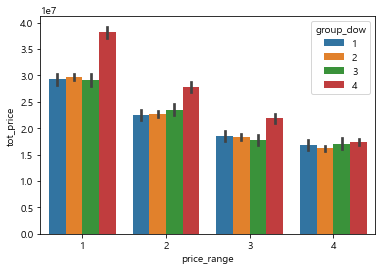

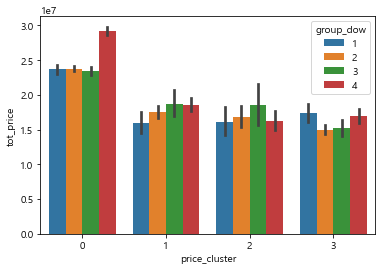

In [205]:
plt.figure(figsize = (15,15))
for col in col_list:
    sns.barplot(y = 'tot_price', x = df[col],hue ='group_dow' , data = df)
    plt.show()

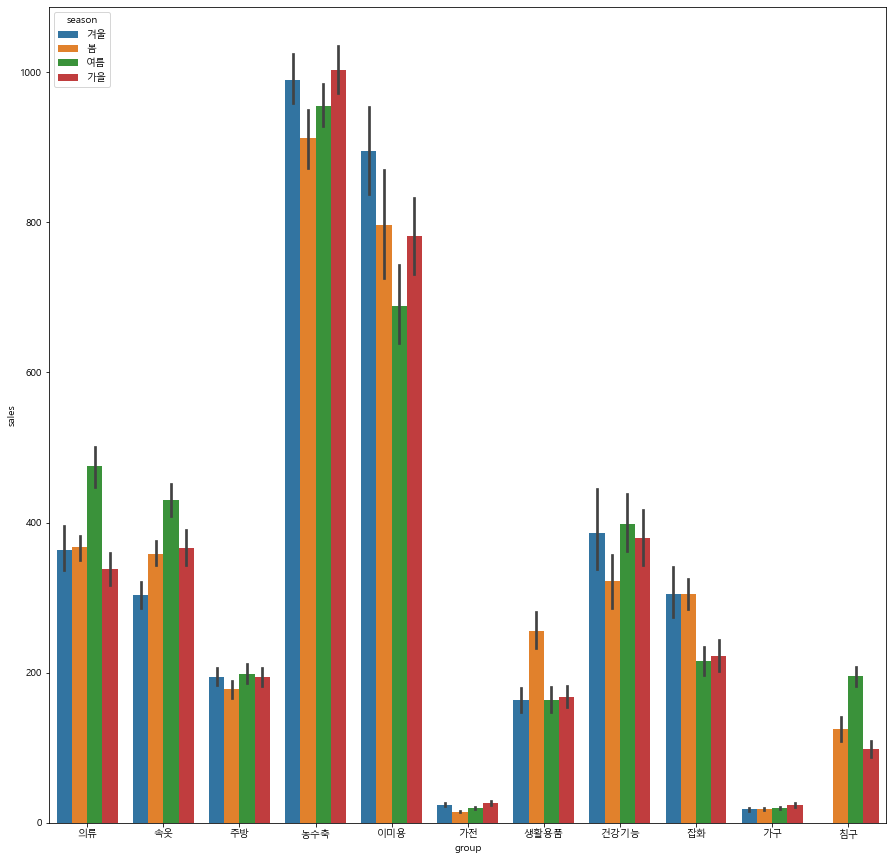

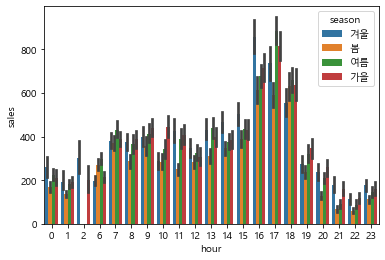

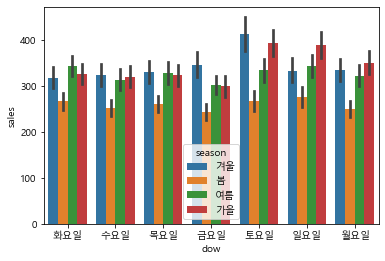

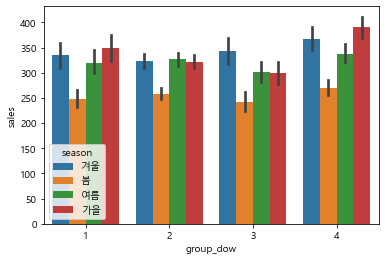

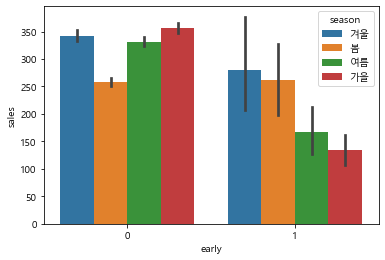

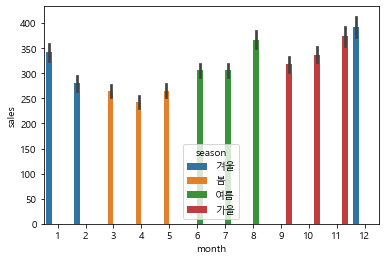

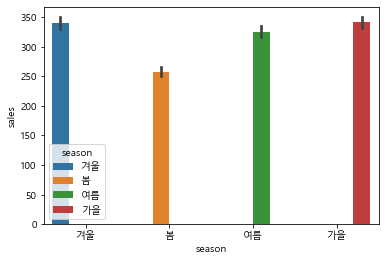

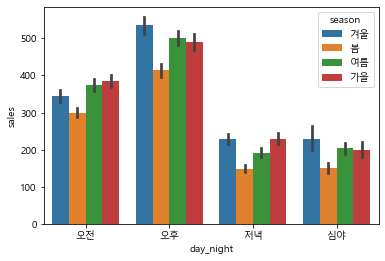

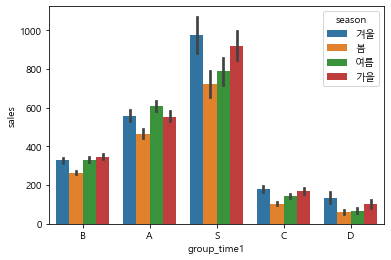

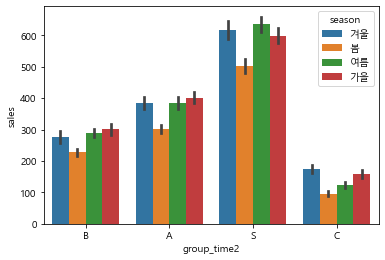

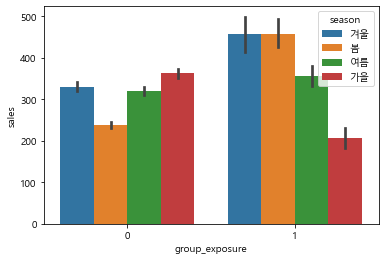

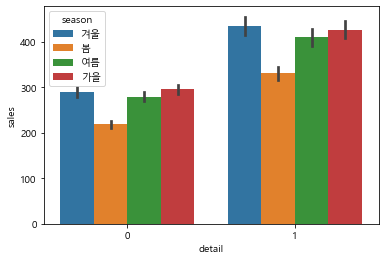

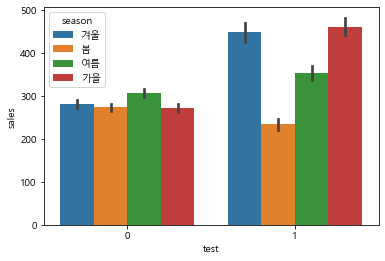

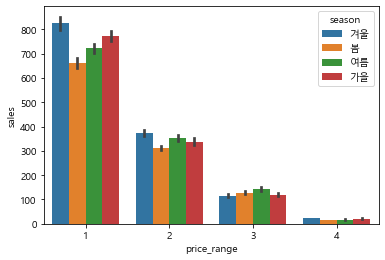

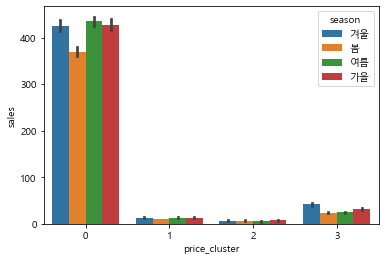

In [206]:
plt.figure(figsize = (15,15))
for col in col_list:
    sns.barplot(y = 'sales', x = df[col],hue ='season' , data = df)
    plt.show()

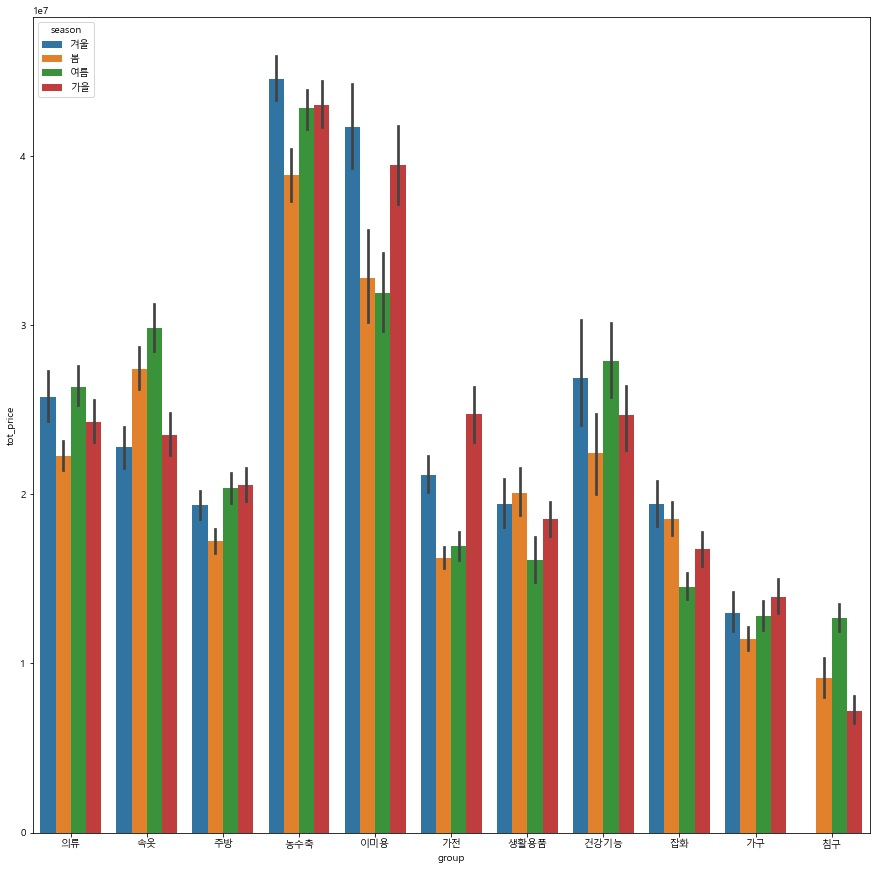

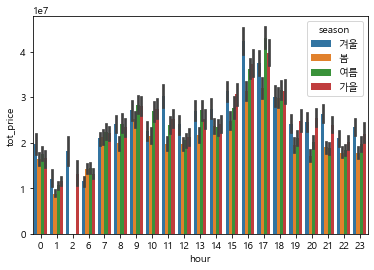

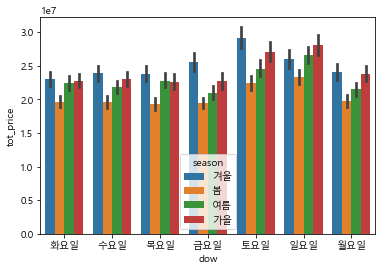

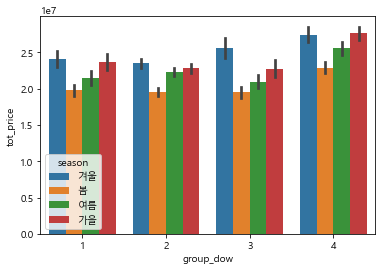

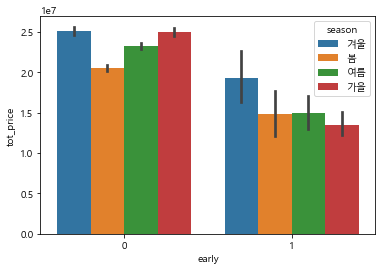

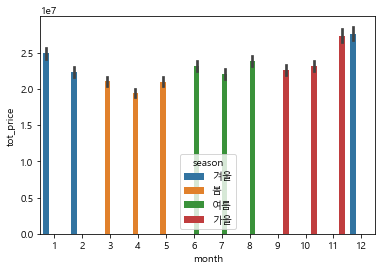

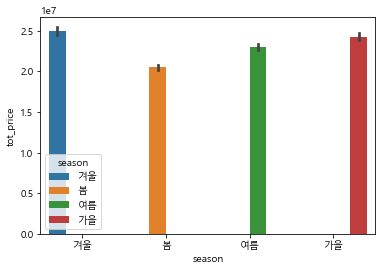

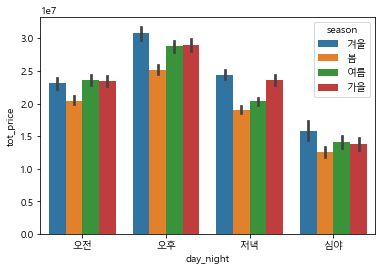

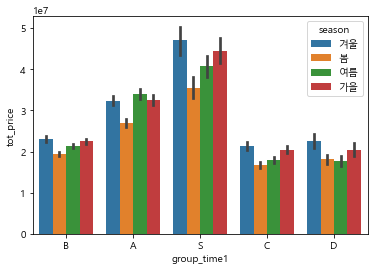

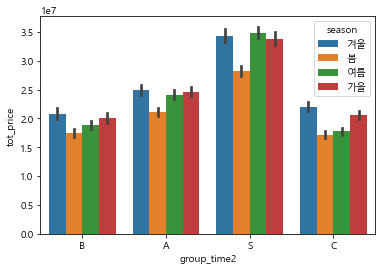

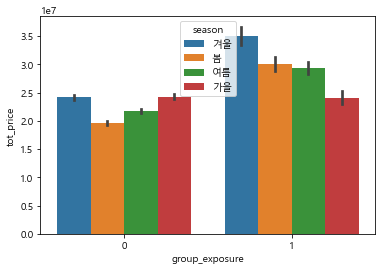

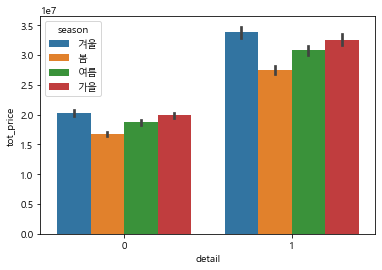

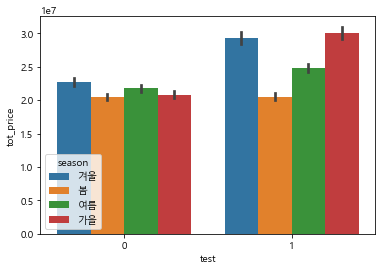

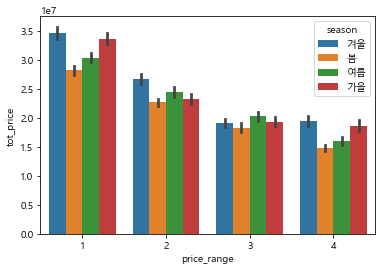

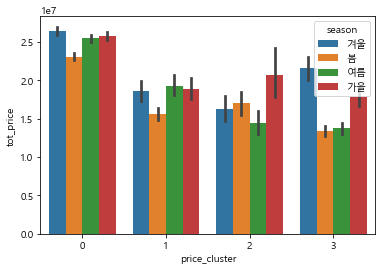

In [207]:
plt.figure(figsize = (15,15))
for col in col_list:
    sns.barplot(y = 'tot_price', x = df[col],hue ='season' , data = df)
    plt.show()

In [208]:
df.columns

Index(['date', 'exposure', 'mot_code', 'product_code', 'product_name', 'group',
       'product_detail', 'brand', 'price', 'tot_price', 'sales', 'hour', 'dow',
       'group_dow', 'ratings', 'early', 'month', 'season', 'day_night',
       'group_time1', 'group_time2', 'group_exposure', 'detail', 'temperature',
       'test', 'price_range', 'price_cluster'],
      dtype='object')

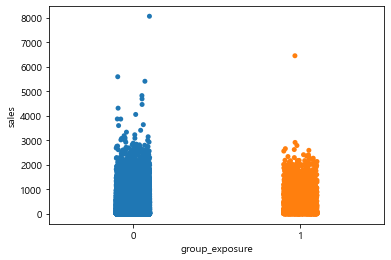

In [209]:
sns.stripplot(x="group_exposure", y="sales", data=df) ## 더 쪼개보자

count    35378.000000
mean        14.957117
std          9.249864
min         -6.450000
25%          6.860000
50%         15.850000
75%         22.890000
max         33.080000
Name: temperature, dtype: float64


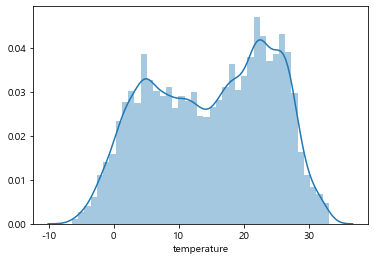

In [210]:
sns.distplot(df['temperature'])
print(df['temperature'].describe())       ## 범주화 해보자

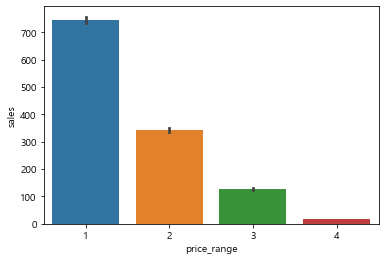

In [211]:
sns.barplot(x = 'price_range', y = 'sales', data = df)

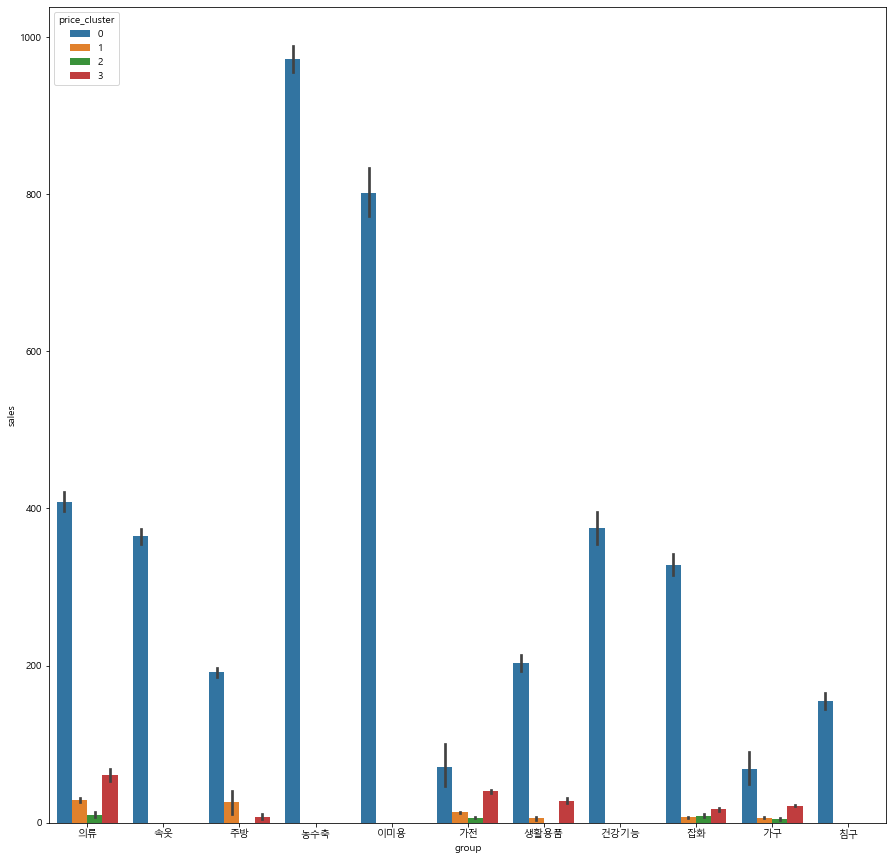

In [212]:
plt.figure(figsize = (15,15))
sns.barplot(x = 'group', y = 'sales', hue = 'price_cluster', data = df)

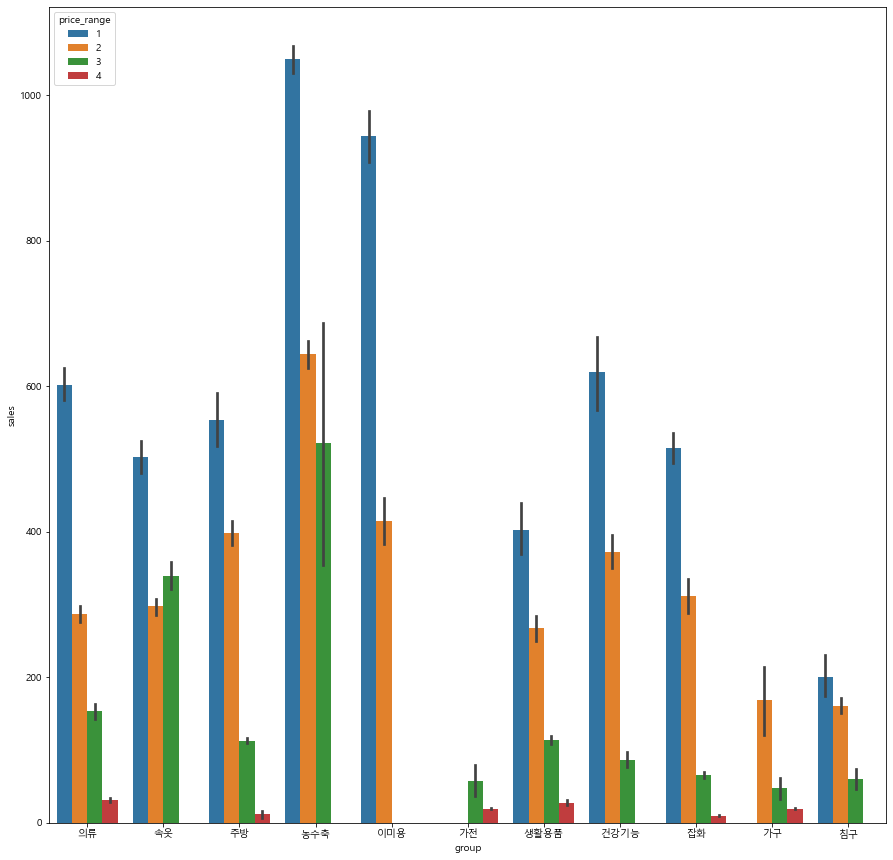

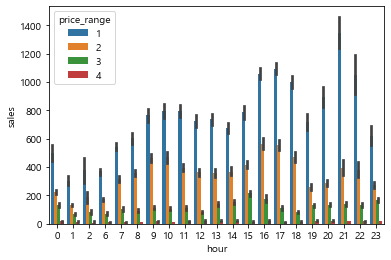

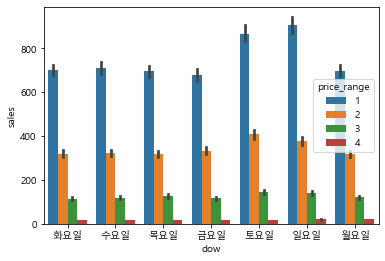

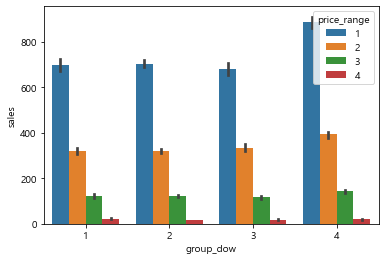

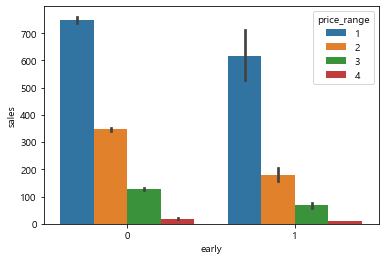

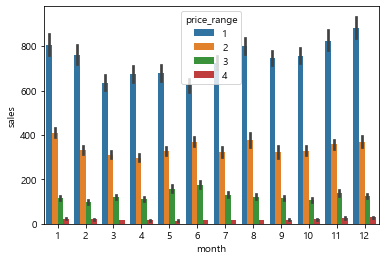

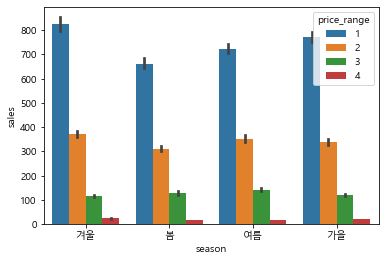

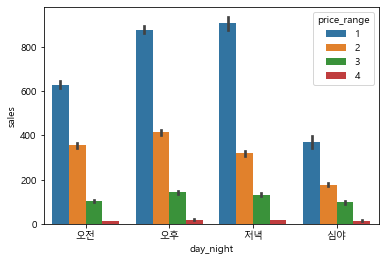

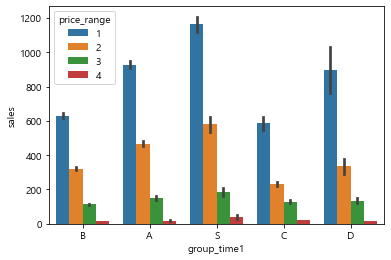

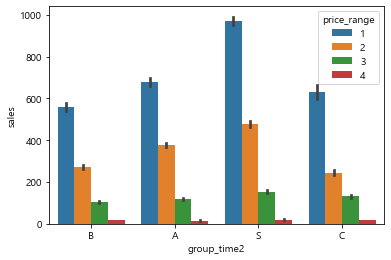

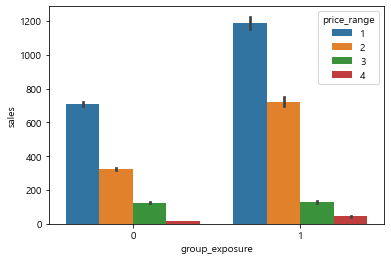

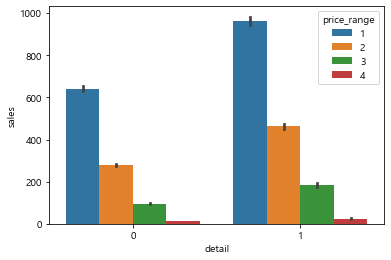

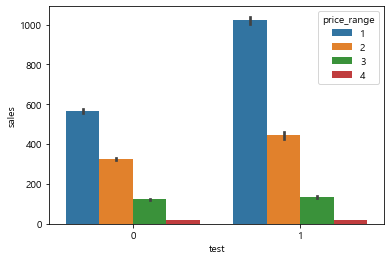

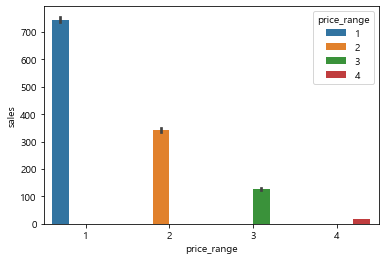

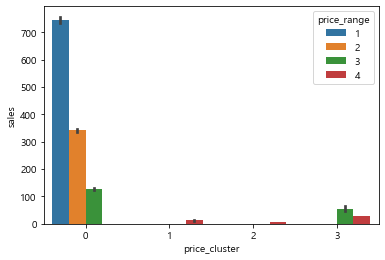

In [213]:
plt.figure(figsize = (15,15))
for col in col_list:
    sns.barplot(y = 'sales', x = df[col],hue ='price_range' , data = df)
    plt.show()

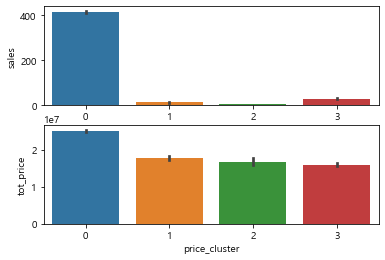

In [214]:
plt.subplot(2,1,1)
sns.barplot(x = 'price_cluster', y = 'sales', data = df)
plt.subplot(2,1,2)
sns.barplot(x = 'price_cluster', y = 'tot_price', data = df)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


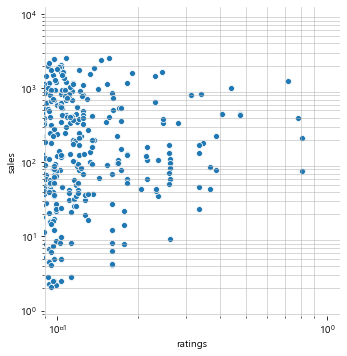

In [252]:
# sns.set_theme(style="whitegrid")

# Load the example planets dataset

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    x="ratings", y="sales",
#     hue="month", size = "",
    palette=cmap, sizes=(10, 200),
)

g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.5)
g.ax.yaxis.grid(True, "minor", linewidth=.5)
g.despine(left=True, bottom=True)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


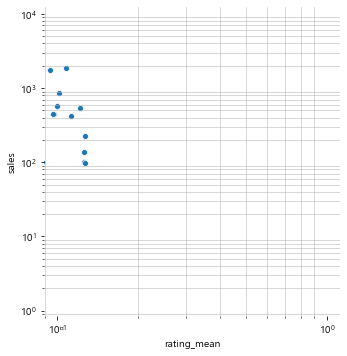

In [253]:
# sns.set_theme(style="whitegrid")

# Load the example planets dataset

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    x="rating_mean", y="sales",
#     hue="month", size = "",
    palette=cmap, sizes=(10, 200),
)

g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.5)
g.ax.yaxis.grid(True, "minor", linewidth=.5)
g.despine(left=True, bottom=True)

# 시청률을 가지고 변수추가

In [40]:
df['ratings'].describe()

count    35378.000000
mean         0.017881
std          0.023141
min          0.000000
25%          0.000000
50%          0.014000
75%          0.027000
max          0.812000
Name: ratings, dtype: float64

In [256]:
df['scale_ratings'] = (df['ratings'] - df['ratings'].min()) / (df['ratings'].max() - df['ratings'].min())

In [268]:
df['scale_ratings'].describe()

count    35378.000000
mean         0.022021
std          0.028499
min          0.000000
25%          0.000000
50%          0.017241
75%          0.033251
max          1.000000
Name: scale_ratings, dtype: float64

In [269]:
df['sales_ratings'] = df['sales'] * df['scale_ratings']

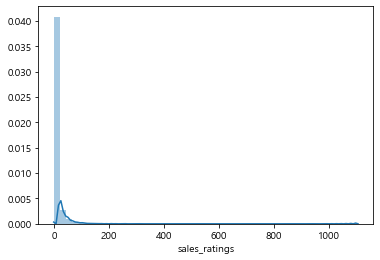

In [270]:
sns.distplot(df['sales_ratings'])

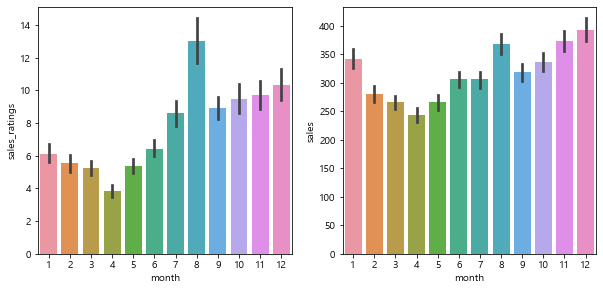

In [277]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.barplot(data =df, x= 'month', y = 'sales_ratings')
plt.subplot(2,2,2)
sns.barplot(data = df , x = 'month', y = 'sales')

## 6월은 시청률대비 판매량이 높지만 1월은 낮다

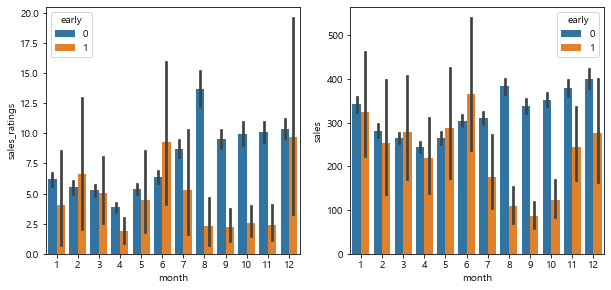

In [284]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.barplot(x = 'month', y = 'sales_ratings', hue = 'early', data = df)
plt.subplot(2,2,2)
sns.barplot(x = 'month', y = 'sales', hue = 'early', data = df)


In [38]:
df.columns

Index(['mot_code', 'product_code', 'product_name', 'group', 'product_detail',
       'brand', 'price', 'tot_price', 'sales', 'hour', 'dow', 'group_dow',
       'ratings', 'early', 'month', 'season', 'day_night', 'group_time1',
       'group_time2', 'group_exposure', 'detail', 'temperature', 'test',
       'price_range', 'price_cluster'],
      dtype='object')

In [188]:
df.columns

Index(['date', 'exposure', 'mot_code', 'product_code', 'product_name', 'group',
       'product_detail', 'brand', 'price', 'tot_price', 'sales', 'hour', 'dow',
       'group_dow', 'ratings', 'early', 'month', 'season', 'day_night',
       'group_time1', 'group_time2', 'group_exposure', 'detail', 'temperature',
       'price_range', 'price_cluster'],
      dtype='object')

In [ ]:
df.to_excel('df_0917.xlsx',index = False)

# 회귀분석으로도 변수의 특징을 확인해보자